In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [92]:
# Number of neurons in each layer
NEURONS = [ 2, 3, 1 ]

# Initial weights (Including Bias)
W1  = np.random.uniform( -.1, .1, size=( NEURONS[0]+1, NEURONS[1] ) ).T
W2  = np.random.uniform( -.1, .1, size=( NEURONS[1]+1, NEURONS[2] ) ).T

# input the dataset
TRAIN_X1 = [ 4, 4, 5, 5, 7,      1,  2,  3,  6,  3,  6,  4,  7 ]
TRAIN_X2 = [ 2, 4, 3, 1, 2,      2,  1,  1,  5,  6,  7,  6,  6 ]
TRAIN_Z  = [ 1, 1, 1, 1, 1,     -1, -1, -1, -1, -1, -1, -1, -1 ]
TRAIN_N  = len(TRAIN_X1)
TRAIN_X0 = np.ones(TRAIN_N)

TEST_X1 = [ 4, 5, 3, 5, 6, 7,    3,  8,  4,  7,  2,  2 ]
TEST_X2 = [ 1, 2, 4, 4, 1, 1,    2,  7,  7,  5,  3,  5 ]
TEST_Z  = [ 1, 1, 1, 1, 1, 1,   -1, -1, -1, -1, -1, -1 ]
TEST_N  = len(TEST_X1)
TEST_X0 = np.ones(TEST_N)

TRAIN_X  = np.array( [TRAIN_X0, TRAIN_X1, TRAIN_X2] ).T

TRAIN_H  = np.ones([ TRAIN_N, NEURONS[1]+1 ])
TRAIN_Y  = np.empty(TRAIN_N)

TRAIN_delta_1 = np.empty([ TRAIN_N, NEURONS[0]+1 ] )
TRAIN_delta_2 = np.empty([ TRAIN_N, NEURONS[2] ] )

In [93]:
def plot_sep_line(w, n):
    
    domain = np.linspace(0,n)
    image  = list( map( lambda x : -(w[1]*x + w[0])/w[2] , domain ) )
    plt.plot(domain, image, color='purple')
    
def plot_result(w,h,n,X1,X2,line=False):
    if line: plot_sep_line(w, n)
    _ = plt.scatter(x=X1[:h], y=X2[:h], color='b')
    _ = plt.scatter(x=X1[h:], y=X2[h:], color='r')

## a)

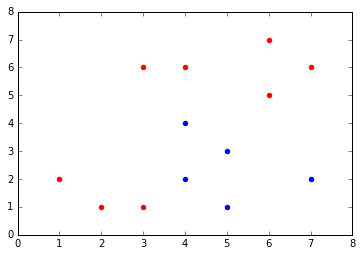

In [94]:
plot_result(W1[0], 5, TRAIN_N, TRAIN_X1, TRAIN_X2)

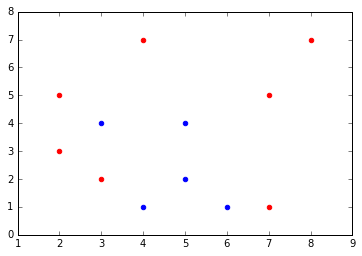

In [95]:
plot_result(W1[0], 5, TEST_N, TEST_X1, TEST_X2)

In [184]:
def sigmoid(x):
    #return 1/(1+np.exp(-x))
    return 2*1/(1+np.exp(-x)) - 1

def sigmoid_deriv(x):  # Might be wrong
    return x*(1-x)

def step(x):
    return np.where( x > 0, 1, -1 )

def linear (x):
    return x

# Pass the activation Function
# Options: linear, step, sigmoid
activate = linear

$ net_i^l = \sum_{j=0}^{j=L} w_{i,j} x_j $, with $x_0=1$ and $w_{i,0}=b_i$

In [185]:
ETA = 1/10

def net(w, x):
    return w.dot( x )

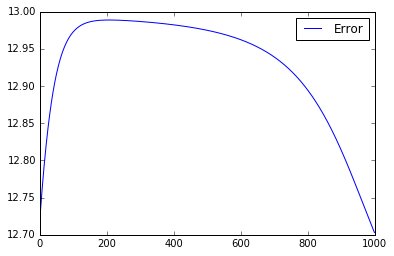

In [188]:
# Initial weights (Including Bias)
W1  = np.random.uniform( -.1, .1, size=( NEURONS[0]+1, NEURONS[1] ) ).T
W2  = np.random.uniform( -.1, .1, size=( NEURONS[1]+1, NEURONS[2] ) ).T


W1_initial = W1
W2_initial = W2


M = 1000
errors = []

for i in range(0,M):
    total_error = 0
    update_avg_2 = np.zeros( NEURONS[1]+1 )
    update_avg_1 = np.zeros( [ NEURONS[1], NEURONS[0]+1 ]  )  # 3x3
    
    # First layer
    for s in range(0, TRAIN_N):
        TRAIN_H[ s, 1: ] = sigmoid( net(W1, TRAIN_X[s]) )

    # Second layer
    for s in range(0, TRAIN_N):
        TRAIN_Y[s] = linear( net(W2, TRAIN_H[s]) )

    # Compute the error    
    ERR = TRAIN_Y - TRAIN_Z

    # Compute the deltas
    for s in range(0, TRAIN_N):
        TRAIN_delta_2[s]   = ERR[s] * sigmoid_deriv( net(W2, TRAIN_H[s]) )

        for i in range(0, NEURONS[0]+1):
            TRAIN_delta_1[s,i] = TRAIN_delta_2[s] * W2[0,i] * sigmoid_deriv( net(W1, TRAIN_X[s])[i] )
    
    # Gradient descend
    for s in range(0, TRAIN_N):
        update_avg_2 += ETA * TRAIN_H[s] * TRAIN_delta_2[s] / TRAIN_N
        
        for j in range(0, NEURONS[0]+1):
            # Where da f*&%$$% is the j ?
            update_avg_1[:,j] += ETA * TRAIN_X[s] * TRAIN_delta_1[s,j] / TRAIN_N
        
        total_error  += ERR[s]**2
    
    # Update the weights
    W1 -= update_avg_1
    W2 -= update_avg_2
    
    errors.append(total_error)
    if total_error == 0 : break

        
def plot_errors(errors):
    plt.plot(range(0,len(errors)), errors, label='Error' )   
    plt.legend()
    
#print('New weights:\n W0 = {0:1.4f}\n W1 = {1:1.4f}\n W2 = {2:1.4f}'.format( *W2 ) )
plot_errors(errors)

In [187]:
TRAIN_Y

array([-0.00366611, -0.00223697, -0.00287581, -0.00430042, -0.00345364,
       -0.00396623, -0.00459948, -0.00449268, -0.00145896, -0.00089309,
       -0.00014992, -0.00084558, -0.00079924])

<br/><br/><br/><br/>

$$ E = ... $$
$$ \frac{ \partial E } { \partial w_1 } $$